In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model 1 

In [73]:
df_1 = pd.read_csv('data/model_1_clean.csv')

In [74]:
df_1.Salary = df_1.Salary/1000
df_1['Salary Adjusted'] = df_1['Salary Adjusted']/1000

In [75]:
df_1.head()

,Unnamed: 0,Player,Pos,Age,G,GS,MP,OBPM,DBPM,ORtg,DRtg,Salary,Salary Adjusted
0,0,Precious Achiuwa,Forward,21.0,61.0,4.0,12.1,-3.6,-0.5,107.0,109.0,2582.160,2967.925
1,1,Steven Adams,Center,27.0,58.0,58.0,27.7,-0.4,0.1,122.0,112.0,29592.695,34013.743
2,2,Bam Adebayo,Center,23.0,64.0,64.0,33.5,2.9,2.0,122.0,108.0,5115.492,5879.729
3,3,LaMarcus Aldridge,Center,35.0,26.0,23.0,25.9,-0.2,-0.2,109.0,113.0,17628.340,20261.954
4,4,Nickeil Alexander-Walker,Guard,22.0,46.0,13.0,21.9,-1.4,0.1,101.0,112.0,3113.160,3578.255


In [76]:
df_1['Pos'].value_counts()

Guard      361
Forward    331
Center     164
Name: Pos, dtype: int64

In [77]:
df_1.describe()

,Unnamed: 0,Age,G,GS,MP,OBPM,DBPM,ORtg,DRtg,Salary,Salary Adjusted
count,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000
mean,427.500000,25.837617,53.116822,26.239486,22.065537,-0.680724,-0.041706,111.954439,112.320093,8314.756160,9308.845190
std,247.250211,4.231382,15.805851,25.386461,8.389874,2.535768,1.204864,9.973721,3.538311,9714.827008,10877.871231
min,0.000000,19.000000,20.000000,0.000000,3.000000,-9.700000,-4.000000,73.000000,100.000000,135.362000,155.584000
25%,213.750000,22.000000,41.000000,4.000000,15.900000,-2.300000,-0.900000,106.000000,110.000000,1789.256000,2023.321750
50%,427.500000,25.000000,55.000000,16.000000,22.100000,-0.900000,-0.100000,112.000000,112.500000,3990.275500,4436.375000
75%,641.250000,29.000000,66.000000,50.000000,29.300000,0.625000,0.700000,118.000000,115.000000,10899.464000,12091.918750
max,855.000000,38.000000,82.000000,82.000000,37.900000,9.200000,4.600000,148.000000,122.000000,45780.966000,49928.610000


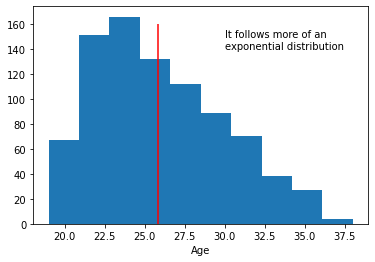

In [78]:
plt.hist(df_1.Age)
plt.xlabel('Age')
plt.text(30, 140, 'It follows more of an \nexponential distribution')
plt.vlines(np.mean(df_1.Age), 0, 160, colors='r')
plt.show()

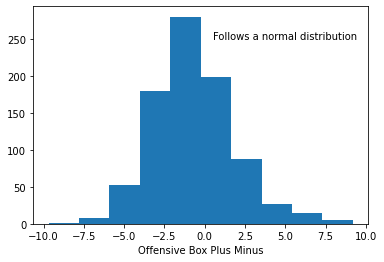

In [79]:
plt.hist(df_1.OBPM)
plt.xlabel('Offensive Box Plus Minus')
plt.text(0.5, 250, 'Follows a normal distribution')
plt.show()

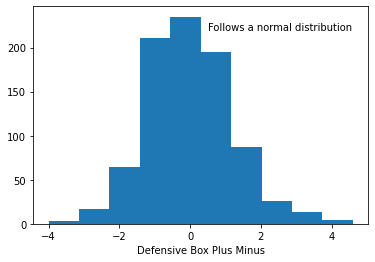

In [80]:
plt.hist(df_1.DBPM)
plt.xlabel('Defensive Box Plus Minus')
plt.text(0.5, 220, 'Follows a normal distribution')
plt.show()

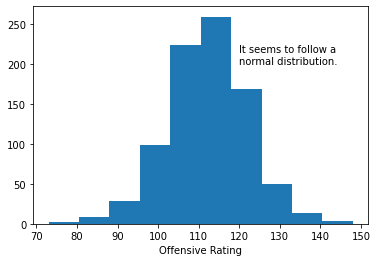

In [81]:
plt.hist(df_1.ORtg)
plt.xlabel('Offensive Rating')
plt.text(120, 200, 'It seems to follow a \nnormal distribution.')
plt.show()

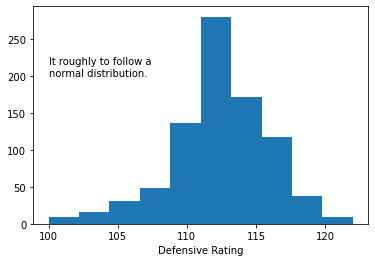

In [82]:
plt.hist(df_1.DRtg)
plt.xlabel('Defensive Rating')
plt.text(100, 200, 'It roughly to follow a \nnormal distribution.')
plt.show()

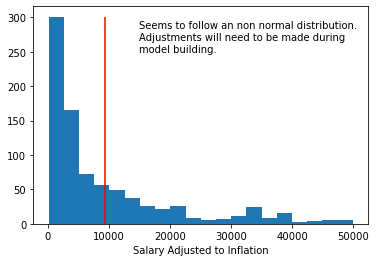

In [83]:
plt.hist(df_1['Salary Adjusted'], bins=20)
plt.xlabel('Salary Adjusted to Inflation')
plt.text(15000, 250, 'Seems to follow an non normal distribution. \nAdjustments will need to be made during \nmodel building.')
plt.vlines(np.mean(df_1['Salary Adjusted']), 0, 300, colors='r')
plt.show()

In [84]:
df_1[['OBPM', 'DBPM', 'ORtg', 'DRtg']].corr()

,OBPM,DBPM,ORtg,DRtg
OBPM,1.000000,0.144029,0.609806,-0.146373
DBPM,0.144029,1.000000,0.309073,-0.765338
ORtg,0.609806,0.309073,1.000000,-0.254184
DRtg,-0.146373,-0.765338,-0.254184,1.000000


<AxesSubplot:>

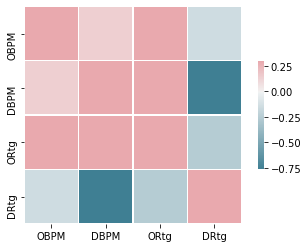

In [85]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_1[['OBPM', 'DBPM', 'ORtg', 'DRtg']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

There is a high correlation between offensive rating and offensive box plus minus, also between defensive rating and defensive box plus minus, which was to be expected. Personally I was hoping there was less correlation since the ratings were based more on box score stats, while box plus minus is based on points scored and allowed when they are on the court, with some adjustments. This means that adjustments have to be made during the model building process.

In [86]:
df_1.groupby(['Pos']).mean()

,Unnamed: 0,Age,G,GS,MP,OBPM,DBPM,ORtg,DRtg,Salary,Salary Adjusted
Pos,,,,,,,,,,,
Center,437.506098,26.658537,53.079268,27.621951,20.434146,-0.100000,0.554878,119.500000,109.432927,8566.768482,9582.583707
Forward,419.069486,25.767372,52.839879,26.287009,21.810574,-0.998792,-0.051057,111.187311,112.359517,8073.712266,9044.841894
Guard,430.684211,25.529086,53.387812,25.567867,23.040443,-0.652909,-0.304155,109.229917,113.595568,8421.281114,9426.551490


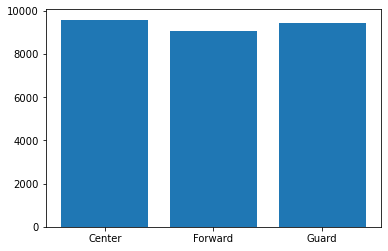

In [87]:
plt.bar(df_1.groupby(['Pos']).mean().index, df_1.groupby(['Pos']).mean()['Salary Adjusted'])
plt.show()

Different positions seems to get around the same pay.

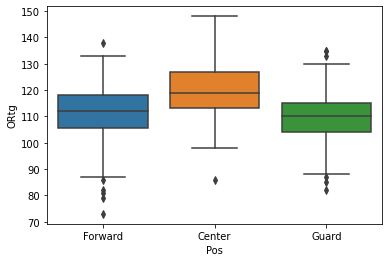

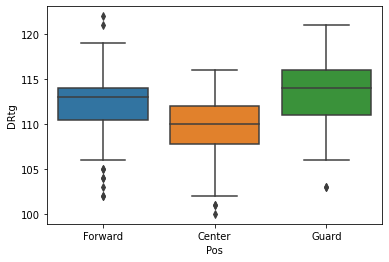

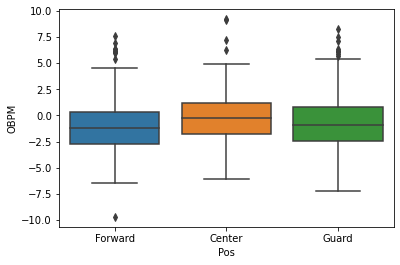

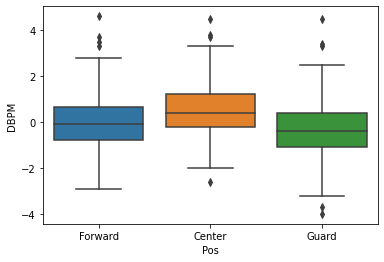

In [88]:
df_1_box = df_1[['ORtg', 'DRtg', 'OBPM', 'DBPM']]
for col in df_1_box:
    sns.boxplot(x=df_1['Pos'], y=df_1_box[col])
    plt.show()

In [89]:
df_1['age_bin'] = pd.cut(df_1.Age, [18, 21, 24, 27, 30, 33, 36, 39])

In [90]:
df_1['age_bin'].value_counts()

(21, 24]    248
(24, 27]    188
(27, 30]    145
(18, 21]    136
(30, 33]     91
(33, 36]     44
(36, 39]      4
Name: age_bin, dtype: int64

**Disclaimer**: LeBron James is one of four players in the 36-39 age bracket, so he might skew the salary results as one of the highest paid players of all time.

In [91]:
df_1['games_bin'] = pd.cut(df_1.G, [20, 35, 50, 65, 82], include_lowest=True)

In [92]:
df_1.games_bin.value_counts()

(50.0, 65.0]      278
(65.0, 82.0]      232
(35.0, 50.0]      200
(19.999, 35.0]    146
Name: games_bin, dtype: int64

In [93]:
df_1['games_started_bin'] = pd.cut(df_1.GS, [0, 20, 40, 60, 82], include_lowest=True)

In [94]:
df_1.games_started_bin.value_counts()

(-0.001, 20.0]    471
(60.0, 82.0]      144
(20.0, 40.0]      126
(40.0, 60.0]      115
Name: games_started_bin, dtype: int64

In [95]:
df_1['mins_bin'] = pd.cut(df_1.MP, [0, 10, 20, 30, 40], include_lowest=True)

In [96]:
df_1.mins_bin.value_counts()

(20.0, 30.0]      305
(10.0, 20.0]      286
(30.0, 40.0]      185
(-0.001, 10.0]     80
Name: mins_bin, dtype: int64

In [97]:
df_1_rtg = df_1.groupby(['age_bin']).mean()

In [98]:
df_1_rtg.head()

,Unnamed: 0,Age,G,GS,MP,OBPM,DBPM,ORtg,DRtg,Salary,Salary Adjusted
age_bin,,,,,,,,,,,
"(18, 21]",415.080882,20.367647,51.029412,22.308824,19.904412,-2.040441,-0.575000,106.617647,113.139706,3500.087419,3921.837390
"(21, 24]",438.520161,22.995968,50.947581,21.931452,20.370968,-0.834677,-0.076210,111.899194,112.237903,4637.102730,5190.974181
"(24, 27]",439.500000,25.946809,55.276596,30.920213,23.252128,-0.298404,0.101596,112.670213,112.117021,9252.529149,10351.423979
"(27, 30]",407.441379,28.875862,56.034483,28.372414,23.809655,-0.194483,0.033793,114.979310,112.675862,11779.260172,13233.322241
"(30, 33]",427.296703,31.824176,53.329670,31.912088,24.076923,0.172527,0.191209,113.164835,111.615385,16321.829923,18199.996791


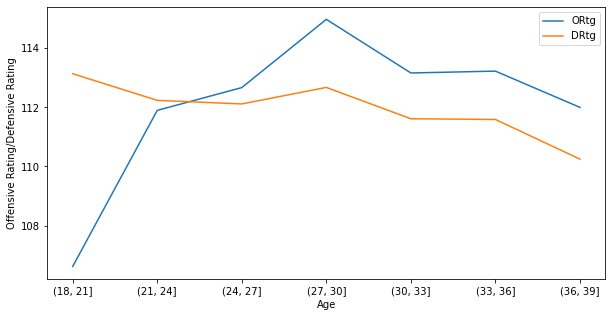

In [99]:
plt.figure(figsize=(10, 5))
plt.plot(list(df_1_rtg.index.astype(str)), np.array(df_1_rtg.ORtg), label='ORtg')
plt.plot(list(df_1_rtg.index.astype(str)), np.array(df_1_rtg.DRtg), label='DRtg')
plt.xlabel('Age')
plt.ylabel('Offensive Rating/Defensive Rating')
plt.legend()
plt.show()

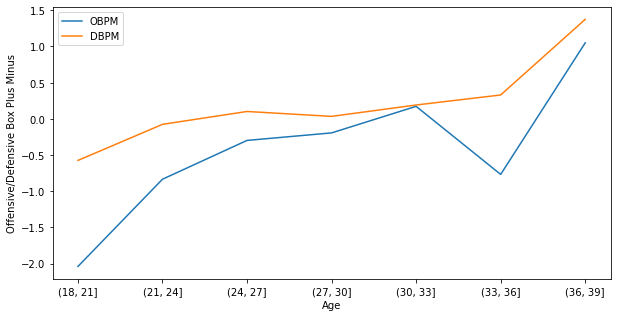

In [100]:
plt.figure(figsize=(10, 5))
plt.plot(list(df_1_rtg.index.astype(str)), np.array(df_1_rtg.OBPM), label='OBPM')
plt.plot(list(df_1_rtg.index.astype(str)), np.array(df_1_rtg.DBPM), label='DBPM')
plt.xlabel('Age')
plt.ylabel('Offensive/Defensive Box Plus Minus')
plt.legend()
plt.show()

The two graphs above suggests that the 'prime' of players usually occur between 27-33, with anomalies such as LeBron being able to maintain that past the norm, which skews our graphs

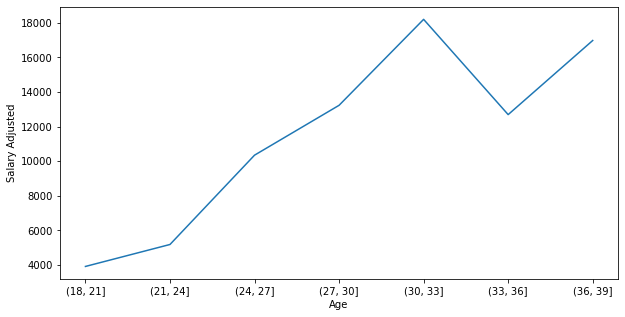

In [101]:
plt.figure(figsize=(10, 5))
plt.plot(list(df_1_rtg.index.astype(str)), np.array(df_1_rtg['Salary Adjusted']))
plt.xlabel('Age')
plt.ylabel('Salary Adjusted')
plt.show()

A speculation can be made that because players performed during their prime years, teams then lock them in a big contract over multiple years, hence skewing the graph towards older players being paid more. Veterans also benefit from a higher minimum salary, and the teams' willingness to pay premium for their experience.

In [102]:
df_1_mins = df_1.groupby(['mins_bin']).mean()

In [103]:
df_1_mins

,Unnamed: 0,Age,G,GS,MP,OBPM,DBPM,ORtg,DRtg,Salary,Salary Adjusted
mins_bin,,,,,,,,,,,
"(-0.001, 10.0]",398.762500,23.500000,32.500000,1.200000,7.597500,-2.661250,-0.327500,107.450000,111.662500,1632.249700,1824.506850
"(10.0, 20.0]",444.017483,25.709790,48.545455,6.979021,15.633916,-1.897902,-0.041608,110.632867,112.297203,3290.211598,3680.213643
"(20.0, 30.0]",428.229508,26.436066,57.921311,30.954098,25.080984,-0.676721,0.029836,113.249180,112.478689,8014.724157,8975.464554
"(30.0, 40.0]",413.189189,26.059459,61.178378,59.070270,33.293514,2.050811,-0.036216,113.810811,112.378378,19466.810335,21796.503481


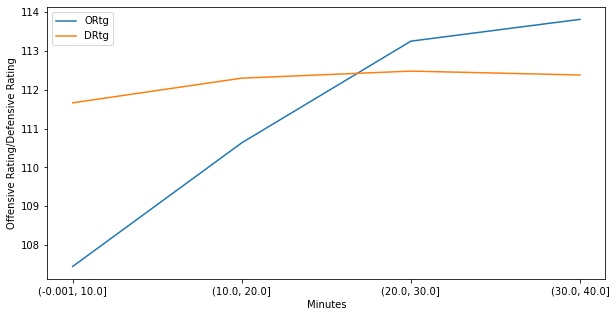

In [104]:
plt.figure(figsize=(10, 5))
plt.plot(list(df_1_mins.index.astype(str)), np.array(df_1_mins.ORtg), label='ORtg')
plt.plot(list(df_1_mins.index.astype(str)), np.array(df_1_mins.DRtg), label='DRtg')
plt.xlabel('Minutes')
plt.ylabel('Offensive Rating/Defensive Rating')
plt.legend()
plt.show()

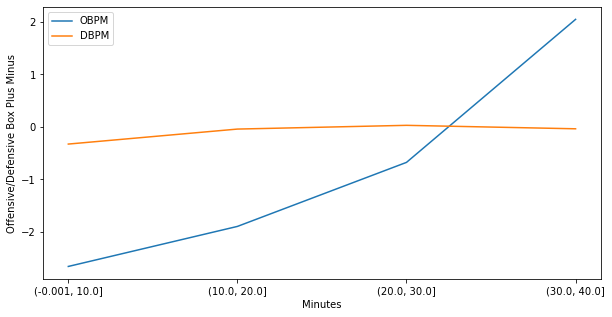

In [105]:
plt.figure(figsize=(10, 5))
plt.plot(list(df_1_mins.index.astype(str)), np.array(df_1_mins.OBPM), label='OBPM')
plt.plot(list(df_1_mins.index.astype(str)), np.array(df_1_mins.DBPM), label='DBPM')
plt.xlabel('Minutes')
plt.ylabel('Offensive/Defensive Box Plus Minus')
plt.legend()
plt.show()

It was interesting to see that defensive rating/box plus minus remains relatively the same despite the minutes

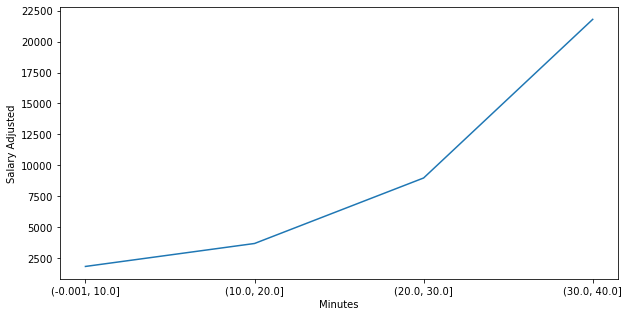

In [106]:
plt.figure(figsize=(10, 5))
plt.plot(list(df_1_mins.index.astype(str)), np.array(df_1_mins['Salary Adjusted']))
plt.xlabel('Minutes')
plt.ylabel('Salary Adjusted')
plt.show()

In [107]:
df_1_g = df_1.groupby(['games_bin']).mean()

In [108]:
df_1_g

,Unnamed: 0,Age,G,GS,MP,OBPM,DBPM,ORtg,DRtg,Salary,Salary Adjusted
games_bin,,,,,,,,,,,
"(19.999, 35.0]",399.335616,25.082192,27.780822,6.102740,15.006164,-2.267808,-0.413699,106.363014,112.773973,4924.009178,5520.660651
"(35.0, 50.0]",400.540000,25.865000,43.325000,15.090000,19.243500,-1.188000,-0.129500,111.155000,112.645000,7489.527855,8456.028000
"(50.0, 65.0]",404.676259,26.014388,58.269784,29.503597,23.818705,-0.313669,0.085971,112.784173,112.309353,9156.614860,10279.859712
"(65.0, 82.0]",495.814655,26.077586,71.327586,44.612069,26.840086,0.315517,0.115086,115.168103,111.767241,10151.213065,11264.432879


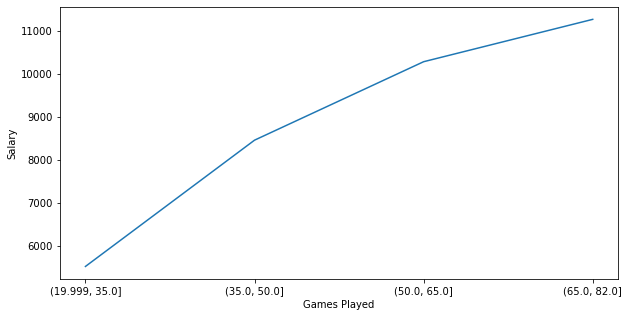

In [109]:
plt.figure(figsize=(10, 5))
plt.plot(list(df_1_g.index.astype(str)), np.array(df_1_g['Salary Adjusted']))
plt.xlabel('Games Played')
plt.ylabel('Salary')
plt.show()

In [110]:
df_1_gs = df_1.groupby(['games_started_bin']).mean()

In [111]:
df_1_gs

,Unnamed: 0,Age,G,GS,MP,OBPM,DBPM,ORtg,DRtg,Salary,Salary Adjusted
games_started_bin,,,,,,,,,,,
"(-0.001, 20.0]",434.095541,25.443737,47.053079,6.061571,16.272824,-1.730998,-0.114013,110.193206,112.377919,3761.454102,4207.484754
"(20.0, 40.0]",406.349206,26.317460,53.095238,30.658730,25.350000,-0.612698,-0.190476,112.174603,113.158730,10117.326333,11354.552738
"(40.0, 60.0]",351.617391,26.373913,57.156522,50.791304,30.231304,0.873043,0.082609,114.034783,112.373913,15360.415965,17321.410591
"(60.0, 82.0]",485.034722,26.277778,69.743056,68.763889,31.617361,1.454167,0.225694,115.861111,111.354167,16003.857201,17805.627090


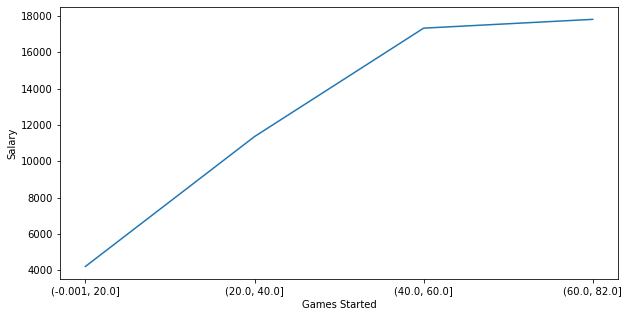

In [112]:
plt.figure(figsize=(10, 5))
plt.plot(list(df_1_gs.index.astype(str)), np.array(df_1_gs['Salary Adjusted']))
plt.xlabel('Games Started')
plt.ylabel('Salary')
plt.show()

In [113]:
pd.pivot_table(df_1, index='age_bin', values='Salary Adjusted')

,Salary Adjusted
age_bin,
"(18, 21]",3921.837390
"(21, 24]",5190.974181
"(24, 27]",10351.423979
"(27, 30]",13233.322241
"(30, 33]",18199.996791
"(33, 36]",12696.056091
"(36, 39]",16978.598000


In [114]:
pd.pivot_table(df_1, index=['age_bin', 'games_bin'], values='Salary Adjusted')

Salary Adjusted
age_bin  games_bin                      
(18, 21] (19.999, 35.0]      2383.164862
         (35.0, 50.0]        2955.576647
         (50.0, 65.0]        4425.525625
         (65.0, 82.0]        5659.014333
(21, 24] (19.999, 35.0]      2464.230158
         (35.0, 50.0]        4657.395000
         (50.0, 65.0]        6961.273326
         (65.0, 82.0]        5774.460981
(24, 27] (19.999, 35.0]      4202.312826
         (35.0, 50.0]        8560.926239
         (50.0, 65.0]       10334.078750
         (65.0, 82.0]       13919.103111
(27, 30] (19.999, 35.0]      7761.993857
         (35.0, 50.0]       13652.890108
         (50.0, 65.0]       13066.074979
         (65.0, 82.0]       14735.549522
(30, 33] (19.999, 35.0]     18918.098067
         (35.0, 50.0]       14554.991600
         (50.0, 65.0]       22245.470793
         (65.0, 82.0]       16155.916741
(33, 36] (19.999, 35.0]     14924.279143
         (35.0, 50.0]       14406.552818
         (50.0, 65.0]        9938.791588
         (65.0, 82.0]       14080.552889
(36, 39] (19.999, 35.0]      2881.021000
         (50.0, 65.0]       31076.175000
         (65.0, 82.0]        2881.021000

In [115]:
pd.pivot_table(df_1, index=['age_bin', 'mins_bin'], values='Salary Adjusted')

Salary Adjusted
age_bin  mins_bin                       
(18, 21] (-0.001, 10.0]      1741.911500
         (10.0, 20.0]        2974.993681
         (20.0, 30.0]        4312.144525
         (30.0, 40.0]        7170.141000
(21, 24] (-0.001, 10.0]      1633.048167
         (10.0, 20.0]        2647.863141
         (20.0, 30.0]        4536.057080
         (30.0, 40.0]       14328.092733
(24, 27] (-0.001, 10.0]      1774.522889
         (10.0, 20.0]        2745.942629
         (20.0, 30.0]        9291.081104
         (30.0, 40.0]       22746.922500
(27, 30] (-0.001, 10.0]      2044.406000
         (10.0, 20.0]        5420.699154
         (20.0, 30.0]       10205.944984
         (30.0, 40.0]       29170.530056
(30, 33] (-0.001, 10.0]      3770.847500
         (10.0, 20.0]        6764.575143
         (20.0, 30.0]       18512.825472
         (30.0, 40.0]       34141.152043
(33, 36] (10.0, 20.0]        5598.126765
         (20.0, 30.0]       12398.453273
         (30.0, 40.0]       38138.468200
(36, 39] (10.0, 20.0]        2881.021000
         (20.0, 30.0]       10060.985000
         (30.0, 40.0]       44911.401000

Players who can still contribute as a starter with starter minutes (30-ish) earn a lot more even if they turn older.

In [116]:
pd.pivot_table(df_1, index=['games_bin', 'mins_bin'], values='Salary Adjusted')

Salary Adjusted
games_bin      mins_bin                       
(19.999, 35.0] (-0.001, 10.0]      1826.552415
               (10.0, 20.0]        2687.129000
               (20.0, 30.0]       11943.970821
               (30.0, 40.0]       27701.455125
(35.0, 50.0]   (-0.001, 10.0]      1812.556042
               (10.0, 20.0]        3514.719067
               (20.0, 30.0]       10162.312127
               (30.0, 40.0]       28944.524750
(50.0, 65.0]   (-0.001, 10.0]      1883.975000
               (10.0, 20.0]        4159.768650
               (20.0, 30.0]        8486.449959
               (30.0, 40.0]       21513.794703
(65.0, 82.0]   (10.0, 20.0]        4273.204892
               (20.0, 30.0]        8027.480569
               (30.0, 40.0]       19291.798747

In [117]:
pd.pivot_table(df_1, index=['Pos', 'age_bin'], values='Salary Adjusted')

Salary Adjusted
Pos     age_bin                  
Center  (18, 21]      4004.304625
        (21, 24]      5091.428511
        (24, 27]     14708.133595
        (27, 30]     12092.307323
        (30, 33]     10470.211087
        (33, 36]      9873.603833
Forward (18, 21]      3662.248638
        (21, 24]      5245.171461
        (24, 27]      9447.228650
        (27, 30]     13042.458404
        (30, 33]     20137.631571
        (33, 36]      8299.566154
        (36, 39]     16978.598000
Guard   (18, 21]      4143.396613
        (21, 24]      5187.956614
        (24, 27]      9099.837648
        (27, 30]     13963.909048
        (30, 33]     21532.356000
        (33, 36]     17486.782211

In [118]:
pd.pivot_table(df_1, index=['Pos', 'games_bin'], values='Salary Adjusted')

Salary Adjusted
Pos     games_bin                      
Center  (19.999, 35.0]      5256.402667
        (35.0, 50.0]        8683.211480
        (50.0, 65.0]        9549.910833
        (65.0, 82.0]       12711.109063
Forward (19.999, 35.0]      5368.867459
        (35.0, 50.0]        6525.191292
        (50.0, 65.0]       11364.229425
        (65.0, 82.0]       10781.735435
Guard   (19.999, 35.0]      5776.424197
        (35.0, 50.0]       10092.708372
        (50.0, 65.0]        9631.510969
        (65.0, 82.0]       10992.342750

The pivot tables support that players in their prime year do get paid more. 

In [119]:
df_1.to_csv('model_1_eda_data.csv')

# Model 2

In [120]:
df_2 = pd.read_csv('data/model_2_clean.csv')

In [121]:
df_2.Salary = df_2.Salary/1000
df_2['Salary Adjusted'] = df_2['Salary Adjusted']/1000

In [122]:
df_2.head()

,Unnamed: 0,Player,Pos,Age,G,GS,MP,eFG%,FTR,TRB%,TOV%,Salary,Salary Adjusted
0,0,Precious Achiuwa,Forward,21.0,61.0,4.0,12.1,54.4,24.324324,16.1,13.5,2582.160,2967.925
1,1,Steven Adams,Center,27.0,58.0,58.0,27.7,61.4,18.867925,17.4,17.5,29592.695,34013.743
2,2,Bam Adebayo,Center,23.0,64.0,64.0,33.5,57.1,35.200000,15.3,15.0,5115.492,5879.729
3,3,LaMarcus Aldridge,Center,35.0,26.0,23.0,25.9,52.5,14.035088,9.4,7.9,17628.340,20261.954
4,4,Nickeil Alexander-Walker,Guard,22.0,46.0,13.0,21.9,50.2,10.000000,7.8,12.4,3113.160,3578.255


In [123]:
df_2.describe()

,Unnamed: 0,Age,G,GS,MP,eFG%,FTR,TRB%,TOV%,Salary,Salary Adjusted
count,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000
mean,427.500000,25.837617,53.116822,26.239486,22.065537,53.200350,18.243307,10.190070,11.989720,8314.756160,9308.845190
std,247.250211,4.231382,15.805851,25.386461,8.389874,6.210733,8.794423,4.505693,3.942919,9714.827008,10877.871231
min,0.000000,19.000000,20.000000,0.000000,3.000000,26.900000,0.000000,3.300000,2.100000,135.362000,155.584000
25%,213.750000,22.000000,41.000000,4.000000,15.900000,49.400000,11.764706,6.800000,9.400000,1789.256000,2023.321750
50%,427.500000,25.000000,55.000000,16.000000,22.100000,53.100000,17.582418,9.100000,11.550000,3990.275500,4436.375000
75%,641.250000,29.000000,66.000000,50.000000,29.300000,56.800000,23.076923,12.525000,14.100000,10899.464000,12091.918750
max,855.000000,38.000000,82.000000,82.000000,37.900000,76.300000,59.740260,26.700000,31.900000,45780.966000,49928.610000


In [124]:
df_hist = df_2[['eFG%', 'FTR', 'TRB%', 'TOV%']]

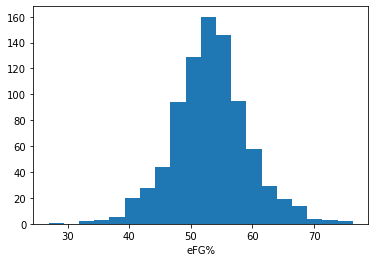

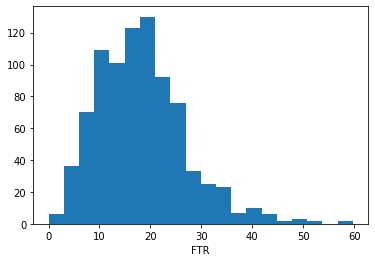

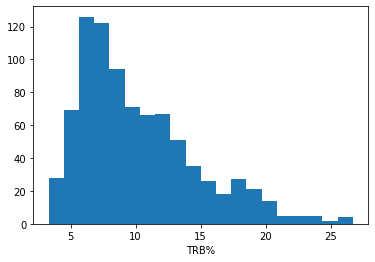

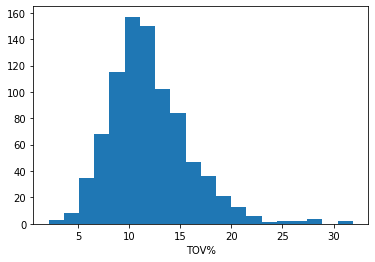

In [125]:
for col in df_hist:
    plt.hist(df_2[col], bins=20)
    plt.xlabel(col)
    plt.show()

All four factors seem to follow normal distributionn with some outliers. Rebounding is a little bit different due to playstyle of positions but still roughly follows a normal distribution.

In [126]:
df_2[['eFG%', 'FTR', 'TRB%', 'TOV%']].corr()

,eFG%,FTR,TRB%,TOV%
eFG%,1.000000,0.169102,0.347887,-0.059893
FTR,0.169102,1.000000,0.348130,0.187982
TRB%,0.347887,0.348130,1.000000,0.206796
TOV%,-0.059893,0.187982,0.206796,1.000000


<AxesSubplot:>

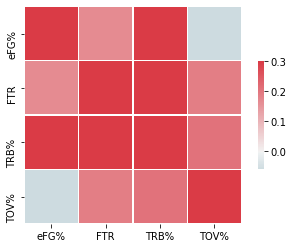

In [127]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_2[['eFG%', 'FTR', 'TRB%', 'TOV%']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

There is low correlation between all four factors. No adjustments will be needed for the model building process.

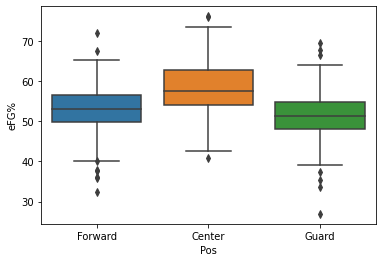

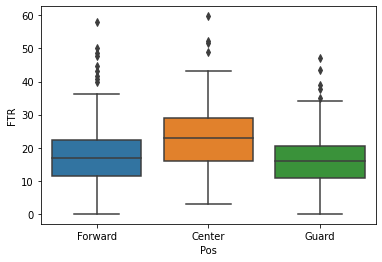

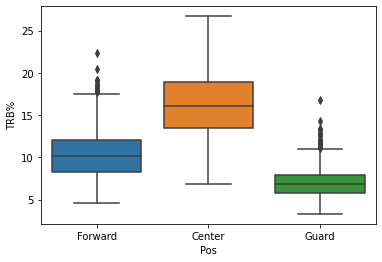

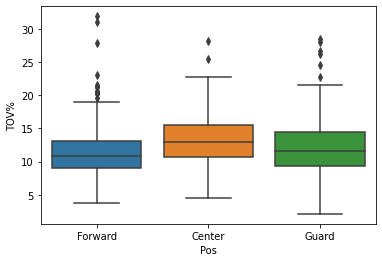

In [128]:
df_2_box = df_2[['eFG%', 'FTR', 'TRB%', 'TOV%']]
for col in df_2_box:
    sns.boxplot(x=df_2['Pos'], y=df_2_box[col])
    plt.show()

In [129]:
df_2['age_bin'] = pd.cut(df_2.Age, [18, 21, 24, 27, 30, 33, 36, 39])
df_2['games_bin'] = pd.cut(df_2.G, [20, 35, 50, 65, 82], include_lowest=True)
df_2['games_started_bin'] = pd.cut(df_2.GS, [0, 20, 40, 60, 82])
df_2['mins_bin'] = pd.cut(df_2.MP, [0, 10, 20, 30, 40], include_lowest=True)

In [130]:
df_2_age = df_2.groupby(['age_bin']).mean()

In [131]:
df_2_age.head()

,Unnamed: 0,Age,G,GS,MP,eFG%,FTR,TRB%,TOV%,Salary,Salary Adjusted
age_bin,,,,,,,,,,,
"(18, 21]",415.080882,20.367647,51.029412,22.308824,19.904412,50.613235,17.378021,10.041912,12.552206,3500.087419,3921.837390
"(21, 24]",438.520161,22.995968,50.947581,21.931452,20.370968,53.442742,18.634553,10.123790,11.867742,4637.102730,5190.974181
"(24, 27]",439.500000,25.946809,55.276596,30.920213,23.252128,53.421809,17.866555,10.243617,11.442553,9252.529149,10351.423979
"(27, 30]",407.441379,28.875862,56.034483,28.372414,23.809655,54.375172,18.380092,10.045517,11.340690,11779.260172,13233.322241
"(30, 33]",427.296703,31.824176,53.329670,31.912088,24.076923,53.985714,19.820313,10.832967,13.037363,16321.829923,18199.996791


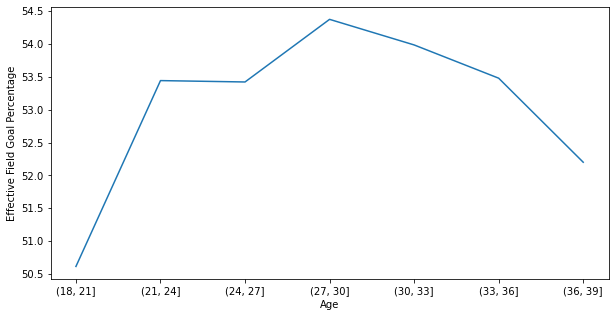

In [132]:
plt.figure(figsize=(10, 5))
plt.plot(list(df_2_age.index.astype(str)), np.array(df_2_age['eFG%']), label='eFG%')
plt.xlabel('Age')
plt.ylabel('Effective Field Goal Percentage')
plt.show()

Players shoot better between 27-33 because they are in their prime athletic years, as can also be seen peaking in offensive rating and box plus minus from above graphs.

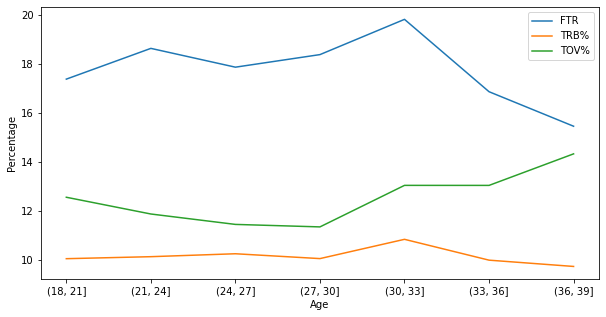

In [133]:
plt.figure(figsize=(10, 5))
plt.plot(list(df_2_age.index.astype(str)), np.array(df_2_age['FTR']), label='FTR')
plt.plot(list(df_2_age.index.astype(str)), np.array(df_2_age['TRB%']), label='TRB%')
plt.plot(list(df_2_age.index.astype(str)), np.array(df_2_age['TOV%']), label='TOV%')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.legend()
plt.show()

In [134]:
df_2_mins = df_2.groupby(['mins_bin']).mean()

In [135]:
df_2_mins.head()

,Unnamed: 0,Age,G,GS,MP,eFG%,FTR,TRB%,TOV%,Salary,Salary Adjusted
mins_bin,,,,,,,,,,,
"(-0.001, 10.0]",398.762500,23.500000,32.500000,1.200000,7.597500,50.951250,17.129547,11.292500,12.671250,1632.249700,1824.506850
"(10.0, 20.0]",444.017483,25.709790,48.545455,6.979021,15.633916,52.424126,17.425478,10.429021,12.326224,3290.211598,3680.213643
"(20.0, 30.0]",428.229508,26.436066,57.921311,30.954098,25.080984,54.092787,16.989237,9.821967,11.448852,8014.724157,8975.464554
"(30.0, 40.0]",413.189189,26.059459,61.178378,59.070270,33.293514,53.901622,22.056770,9.950811,12.066486,19466.810335,21796.503481


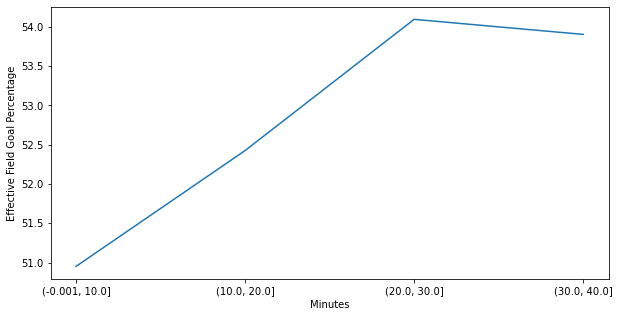

In [136]:
plt.figure(figsize=(10, 5))
plt.plot(list(df_2_mins.index.astype(str)), np.array(df_2_mins['eFG%']), label='eFG%')
plt.xlabel('Minutes')
plt.ylabel('Effective Field Goal Percentage')
plt.show()

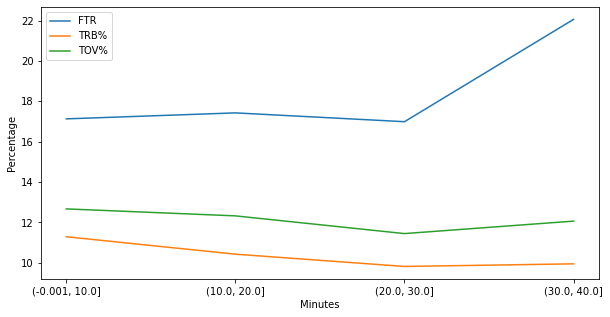

In [137]:
plt.figure(figsize=(10, 5))
plt.plot(list(df_2_mins.index.astype(str)), np.array(df_2_mins['FTR']), label='FTR')
plt.plot(list(df_2_mins.index.astype(str)), np.array(df_2_mins['TRB%']), label='TRB%')
plt.plot(list(df_2_mins.index.astype(str)), np.array(df_2_mins['TOV%']), label='TOV%')
plt.xlabel('Minutes')
plt.ylabel('Percentage')
plt.legend()
plt.show()

In [138]:
df_2_games = df_2.groupby(['games_bin']).mean()

In [139]:
df_2_games.head()

,Unnamed: 0,Age,G,GS,MP,eFG%,FTR,TRB%,TOV%,Salary,Salary Adjusted
games_bin,,,,,,,,,,,
"(19.999, 35.0]",399.335616,25.082192,27.780822,6.102740,15.006164,49.972603,17.298221,10.339726,12.916438,4924.009178,5520.660651
"(35.0, 50.0]",400.540000,25.865000,43.325000,15.090000,19.243500,52.793000,18.068251,10.461000,11.961000,7489.527855,8456.028000
"(50.0, 65.0]",404.676259,26.014388,58.269784,29.503597,23.818705,53.565827,18.986174,9.842446,12.018705,9156.614860,10279.859712
"(65.0, 82.0]",495.814655,26.077586,71.327586,44.612069,26.840086,55.144828,18.098808,10.278879,11.396552,10151.213065,11264.432879


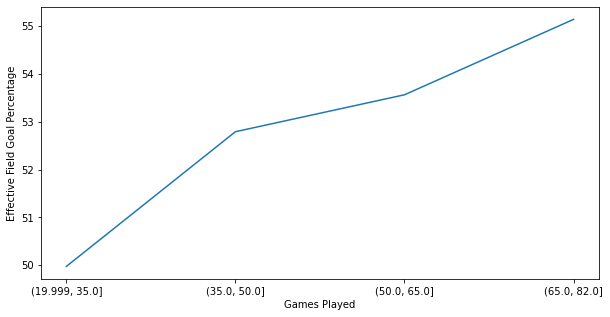

In [140]:
plt.figure(figsize=(10, 5))
plt.plot(list(df_2_games.index.astype(str)), np.array(df_2_games['eFG%']), label='eFG%')
plt.xlabel('Games Played')
plt.ylabel('Effective Field Goal Percentage')
plt.show()

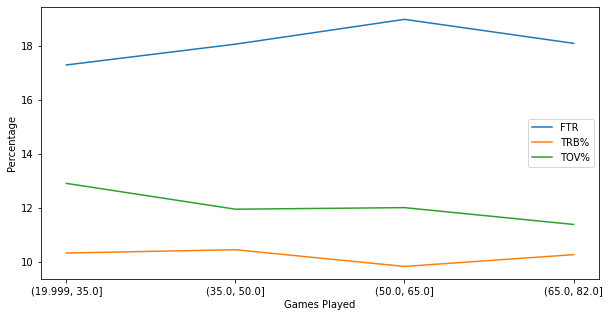

In [141]:
plt.figure(figsize=(10, 5))
plt.plot(list(df_2_games.index.astype(str)), np.array(df_2_games['FTR']), label='FTR')
plt.plot(list(df_2_games.index.astype(str)), np.array(df_2_games['TRB%']), label='TRB%')
plt.plot(list(df_2_games.index.astype(str)), np.array(df_2_games['TOV%']), label='TOV%')
plt.xlabel('Games Played')
plt.ylabel('Percentage')
plt.legend()
plt.show()

In [142]:
df_2.to_csv('model_2_eda_data.csv')